In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:08<00:00, 22.0MB/s]
100% 163M/163M [00:08<00:00, 20.5MB/s]


In [4]:
from zipfile import ZipFile

In [5]:
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [7]:
import os

In [8]:
mask_files = os.listdir('/content/data/with_mask')

In [9]:
len(mask_files)

3725

In [10]:
not_mask_files = os.listdir('/content/data/without_mask')

In [11]:
len(not_mask_files)

3828

In [12]:
mask_label = [1]*3725
not_mask_label = [0]*3828

In [13]:
label = mask_label + not_mask_label

In [14]:
label[0:5]

[1, 1, 1, 1, 1]

In [15]:
label[-5:]

[0, 0, 0, 0, 0]

In [16]:
len(label)

7553

In [17]:
import numpy as np

In [18]:
from PIL import Image

In [19]:
with_image_path = '/content/data/with_mask/'

data = []

for img_path in mask_files:
  image = Image.open(with_image_path+img_path)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_image_path = '/content/data/without_mask/'

for img_path in not_mask_files:
  image = Image.open(without_image_path+img_path)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
len(data)

7553

In [21]:
from google.colab.patches import cv2_imshow

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = np.array(data)
y = np.array(label)

In [24]:
X.shape

(7553, 128, 128, 3)

In [25]:
y.shape

(7553,)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [27]:
print(X_train.shape, X_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
X_train, X_test = X_train/255, X_test/255

In [29]:
print(X_train.shape, X_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3)


In [30]:
from tensorflow.keras import Sequential, layers, models

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                        

In [34]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10)

Epoch 1/10
189/189 [==============================] - 21s 40ms/step - loss: 0.5126 - accuracy: 0.8335 - val_loss: 1.9058 - val_accuracy: 0.5592
Epoch 2/10
189/189 [==============================] - 6s 30ms/step - loss: 0.3007 - accuracy: 0.8865 - val_loss: 0.6489 - val_accuracy: 0.7981
Epoch 3/10
189/189 [==============================] - 6s 31ms/step - loss: 0.2187 - accuracy: 0.9144 - val_loss: 0.7535 - val_accuracy: 0.7459
Epoch 4/10
189/189 [==============================] - 6s 29ms/step - loss: 0.1774 - accuracy: 0.9290 - val_loss: 0.2722 - val_accuracy: 0.8809
Epoch 5/10
189/189 [==============================] - 5s 29ms/step - loss: 0.1328 - accuracy: 0.9528 - val_loss: 0.2456 - val_accuracy: 0.9093
Epoch 6/10
189/189 [==============================] - 6s 32ms/step - loss: 0.1212 - accuracy: 0.9585 - val_loss: 0.1838 - val_accuracy: 0.9325
Epoch 7/10
189/189 [==============================] - 6s 30ms/step - loss: 0.0887 - accuracy: 0.9682 - val_loss: 0.2980 - val_accuracy: 0.910

In [35]:
import pickle

In [48]:
pickle.dump(model,open('masked_model.pkl','wb'))

In [37]:
import cv2

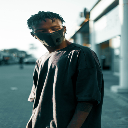

1/1 [==============================] - 0s 18ms/step
[[0.99945074]]
With Mask


In [40]:
img_path = 'untitled-design-1-1.png'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
print(pred)
pred = pred[0]
if pred > 0.5:
  print('With Mask')
else:
  print('Without Mask')

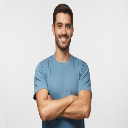

1/1 [==============================] - 0s 30ms/step
[[0.11867291]]
Without Mask


In [41]:
img_path = 'Manhh.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
print(pred)
pred = pred[0]
if pred > 0.5:
  print('With Mask')
else:
  print('Without Mask')

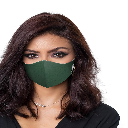

1/1 [==============================] - 0s 20ms/step
[[0.9980254]]
With Mask


In [43]:
img_path = 'Mas.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
print(pred)
pred = pred[0]
if pred > 0.5:
  print('With Mask')
else:
  print('Without Mask')

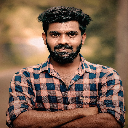

1/1 [==============================] - 0s 19ms/step
[[0.14313291]]
Without Mask


In [44]:
img_path = 'man.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
print(pred)
pred = pred[0]
if pred > 0.5:
  print('With Mask')
else:
  print('Without Mask')

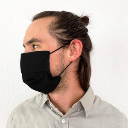

1/1 [==============================] - 0s 29ms/step
[[0.9990496]]
With Mask


In [45]:
img_path = 'black.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
print(pred)
pred = pred[0]
if pred > 0.5:
  print('With Mask')
else:
  print('Without Mask')

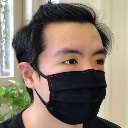

1/1 [==============================] - 0s 19ms/step
[[0.99416476]]
With Mask


In [46]:
img_path = 'img.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
print(pred)
pred = pred[0]
if pred > 0.5:
  print('With Mask')
else:
  print('Without Mask')

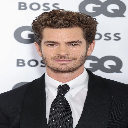

1/1 [==============================] - 0s 19ms/step
[[0.00695778]]
Without Mask


In [47]:
img_path = 'andrew.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
print(pred)
pred = pred[0]
if pred > 0.5:
  print('With Mask')
else:
  print('Without Mask')

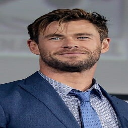

1/1 [==============================] - 0s 28ms/step
[[0.3763941]]
Without Mask


In [49]:
img_path = 'chrishem.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
print(pred)
pred = pred[0]
if pred > 0.5:
  print('With Mask')
else:
  print('Without Mask')